In [155]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import numpy as np
import imageio

from typing import Tuple
from PIL import ImageFont, ImageDraw, Image

from tqdm import tqdm

In [126]:
def text_to_image(
    text: str,
    font_size: int,
    color: Tuple[int, int, int, int], final_size = 100
):
    font = ImageFont.truetype("/System/Library/Fonts/SFNS.ttf", size=font_size) # for macos

    temp_img = Image.new("RGBA", (1, 1), (0,0,0,0))
    temp_draw = ImageDraw.Draw(temp_img)

    bbox = temp_draw.multiline_textbbox((0, 0), text, font=font)

    width = bbox[2] - bbox[0]
    height = bbox[3] - bbox[1]

    img = Image.new("RGBA", (width, height), (0,0,0,0))
    draw = ImageDraw.Draw(img)

    draw.multiline_text((-bbox[0], -bbox[1]), text, font=font, fill=color)

    # return img
    # --- Resize to 100x100 while preserving aspect ratio ---
    img.thumbnail((final_size, final_size), Image.LANCZOS)

    # --- Letterbox into exact 100×100 canvas ---
    final_img = Image.new("RGBA", (final_size, final_size), (0, 0, 0, 0))

    # Center the scaled text
    x = (final_size - img.size[0]) // 2
    y = (final_size - img.size[1]) // 2

    final_img.paste(img, (x, y))

    return np.array(final_img)#[:, :, :3]

img = text_to_image(text = "123456789876", color = "black", font_size=20)
img.shape

(100, 100, 4)

In [124]:
np.array(img).shape

(100, 100, 4)

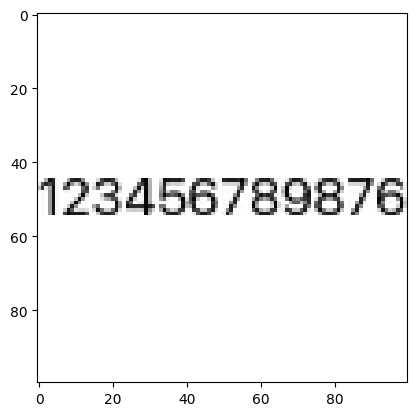

In [127]:
plt.imshow(img)

In [ ]:
with open('the-verdict.txt', 'r', encoding='utf8') as f:
    text = f.read()
    
text[:100]

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g'

In [142]:
skip = 2
for i in range(0,10,2):
    if i != 0:
        print(i-1, i+skip)
    else:
        print(i, i+skip)

0 2
1 4
3 6
5 8
7 10


In [151]:
n_len = 20
chunks = [text[i:i+n_len] for i in range(0, len(text), n_len)]

for i in range(0, len(chunks), n_len):
    print(chunks[i: i+n_len])

['I HAD always thought', ' Jack Gisburn rather', ' a cheap genius--tho', 'ugh a good fellow en', 'ough--so it was no g', 'reat surprise to me ', 'to hear that, in the', ' height of his glory', ', he had dropped his', ' painting, married a', ' rich widow, and est', 'ablished himself in ', 'a villa on the Rivie', 'ra. (Though I rather', ' thought it would ha', 've been Rome or Flor', 'ence.)\n\n"The height ', 'of his glory"--that ', 'was what the women c', 'alled it. I can hear']
[' Mrs. Gideon Thwing-', '-his last Chicago si', 'tter--deploring his ', 'unaccountable abdica', 'tion. "Of course it\'', 's going to send the ', 'value of my picture ', "'way up; but I don't", ' think of that, Mr. ', 'Rickham--the loss to', ' Arrt is all I think', ' of." The word, on M', "rs. Thwing's lips, m", 'ultiplied its _rs_ a', 's though they were r', 'eflected in an endle', 'ss vista of mirrors.', ' And it was not only', ' the Mrs. Thwings wh', 'o mourned. Had not t']
['he exquisite Hermia ', 'Croft, at

In [174]:
dataset_path = "dataset"

factor = 2

with open('the-verdict.txt', 'r', encoding='utf8') as f:
    text = f.read()
    

n_len = int(20/factor)
chunks = [text[i:i+n_len] for i in range(0, len(text), n_len)]

n_height = int(8/factor)
for idx, i in tqdm(enumerate(range(0, len(chunks), n_height))):
    text = '\n'.join(chunks[i: i+n_height])
    img = text_to_image(text = text, color = "black", font_size=20, final_size = 100)
    plt.imsave(f"{dataset_path}/{idx}_{text}.jpg", img.astype(np.uint8))

512it [00:02, 226.41it/s]
